แบบฝึกหัดนี้ใช้ชุดข้อมูล Immunotherapy.csv ซึ่งเป็นข้อมูลผลของการรักษาโรคหูดชนิดหนึ่งโดยใช้วิธีภูมิคุ้มกันบำบัด รายละเอียดของชุดข้อมูลแสดงในภาพด้านล่าง

ข้อมูลชุดนี้ประกอบด้วยตัวแปร (Features) ต่างๆ ที่ใช้ในการวิเคราะห์ผลการรักษา ดังนี้ครับ:

ตัวแปรเป้าหมาย (Target Variable):

Result_of_Treatment (Response to treatment): ผลลัพธ์จากการรักษา

Yes: รักษาหาย / ตอบสนองต่อการรักษา

No: รักษาไม่หาย / ไม่ตอบสนอง

ตัวแปรปัจจัย (Features):

sex (Gender): เพศของผู้ป่วย (ในเอกสารระบุว่ามี ชาย 41 คน, หญิง 49 คน)

age: อายุของผู้ป่วย (หน่วยเป็นปี, ช่วงข้อมูล 15-56 ปี)

Time (Time elapsed before treatment): ระยะเวลาที่เป็นโรคก่อนเข้ามารับการรักษา (หน่วยเป็นเดือน)

Number_of_warts: จำนวนเม็ดหูดที่มี (1-19 เม็ด)

Type (Types of wart): ประเภทของหูด

1: Common Warts (หูดทั่วไป - มักขึ้นตามนิ้วมือ หลังมือ)

2: Plantar Warts (หูดที่ฝ่าเท้า)

3: Both (มีทั้งสองแบบ)

Area (Surface area of the warts): พื้นที่ผิวรวมของหูด (หน่วยเป็น ตร.มม.)

induration_diameter: ขนาดเส้นผ่านศูนย์กลางของรอยแข็ง (Induration) ที่เกิดจากการทดสอบผิวหนังเบื้องต้น (Initial test) หน่วยเป็น มม. (ใช้วัดปฏิกิริยาตอบสนองของภูมิคุ้มกัน)

สรุปภาพรวม: ชุดข้อมูลนี้มักใช้สำหรับงาน Classification เพื่อสร้างโมเดลทำนายว่า ผู้ป่วยที่มีลักษณะแบบนี้ (อายุ, เพศ, ประเภทหูด, ขนาด ฯลฯ) จะ รักษาหายหรือไม่ (Yes/No) ครับ

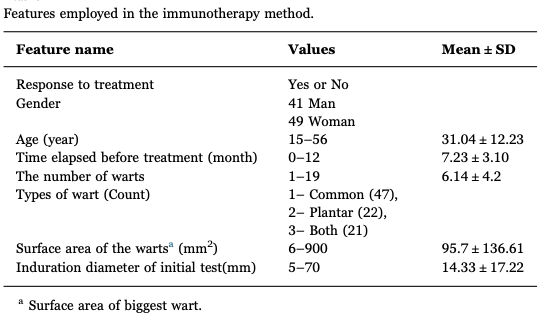

![warts](https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/warts.png)

In [1]:
#cell นี้สำหรับการใช้ใน Colab เท่านั้น
#%pip install scikit_posthocs

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scikit_posthocs as sp

In [8]:
df_impt = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/Immunotherapy.csv")
df_impt = pd.read_csv("Immunotherapy.csv")
df_impt.head()
#df_impt.shape

,gender,age,time,number_of_warts,type,area,induration_diameter,response
0,Female,15,1.75,1,Plantar,49,7,No
1,Female,38,2.50,1,Both,43,50,Yes
2,Female,24,4.25,1,common,174,30,Yes
3,Female,34,8.50,1,Plantar,163,7,No
4,Female,53,10.00,1,Plantar,30,25,Yes


In [9]:
df_impt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     object 
 1   age                  90 non-null     int64  
 2   time                 90 non-null     float64
 3   number_of_warts      90 non-null     int64  
 4   type                 90 non-null     object 
 5   area                 90 non-null     int64  
 6   induration_diameter  90 non-null     int64  
 7   response             90 non-null     object 
dtypes: float64(1), int64(4), object(3)
memory usage: 5.8+ KB


\
ให้นิสิตตอบคำถามพร้อมทั้งแสดงโค้ดที่ใช้ในการหาคำตอบ

1. แสดงวิธีการเพื่อให้ได้มาซึ่งกราฟด้านล่างนี้

item1.svg

![](download (2).png)

![Box plot showing age distributions for No and Yes responses in Female and Male groups, with Female on the left and Male on the right, displaying medians, quartiles, and outliers in a statistical analysis of immunotherapy data.](download (2).png)

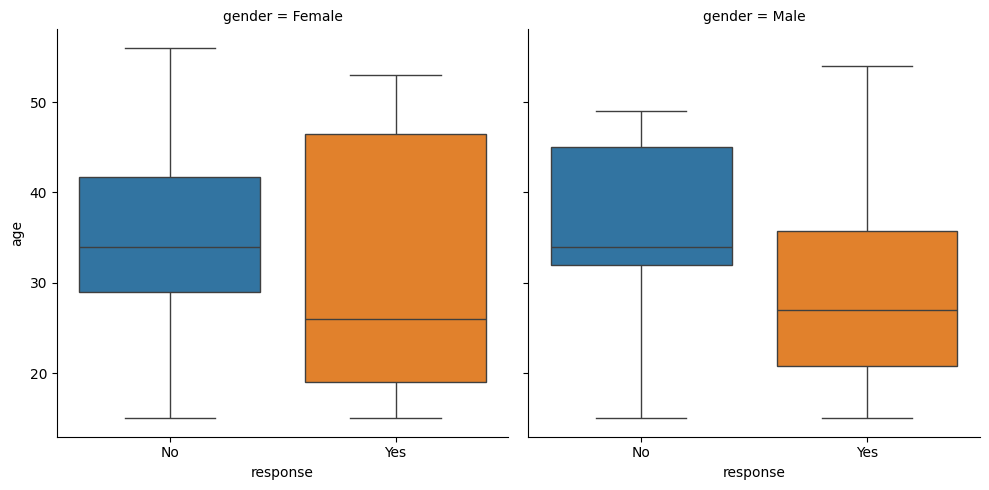

In [6]:
# Your code
sns.catplot(data=df_impt,
            kind='box',
            x='response',
            y='age',
            col='gender',
            hue='response')

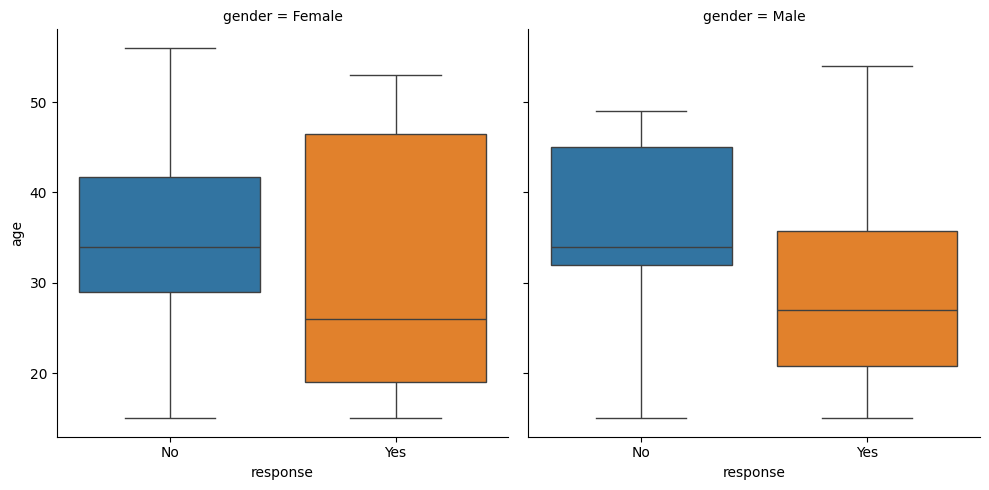

In [13]:
import seaborn as sns

# Plot data
sns.catplot(x="response", y="age", hue="response", data=df_impt, kind="box", col="gender")


จากการพิจารณาภาพรวมทั้งหมดที่คุณส่งมา ทั้งตารางข้อมูล (Metadata), ความรู้เรื่องโรค (Warts 101), และกราฟ Boxplot ผมขอสรุปการแปลผลข้อมูลชุดนี้ให้เข้าใจง่ายๆ ดังนี้ครับ

1. ชุดข้อมูลนี้คืออะไร? (Context)
นี่คือข้อมูลสถิติการรักษา โรคหูด (Warts) ด้วยวิธี ภูมิคุ้มกันบำบัด (Immunotherapy) จากผู้ป่วยทั้งหมด 90 คน (ชาย 41, หญิง 49) เป้าหมายคือการหาคำตอบว่า "ปัจจัยอะไรบ้างที่ทำให้รักษาหาย (Yes) หรือไม่หาย (No)" โดยปัจจัยที่เก็บมาวิเคราะห์ได้แก่:

อายุ (Age) และ เพศ (Gender)

ชนิดของหูด (Type): เช่น หูดทั่วไป (Common) หรือหูดฝ่าเท้า (Plantar)

ความรุนแรง: วัดจากจำนวนเม็ด, ขนาดพื้นที่ผิว, และระยะเวลาที่เป็น

2. การแปลผลกราฟ Boxplot (จุดสำคัญ)
กราฟที่คุณส่งมา แสดงความสัมพันธ์ระหว่าง อายุ (Age) กับ ผลการรักษา (Response) โดยแยกตาม เพศ ครับ

สิ่งที่กราฟบอกเรา:

ดูที่กราฟฝั่งซ้าย (ผู้หญิง - Female):

กล่องสีส้ม (Yes - รักษาหาย): อยู่ในระดับที่ ต่ำกว่า กล่องสีฟ้า (No - ไม่หาย) อย่างชัดเจน

ค่ามัธยฐาน (เส้นขีดกลางกล่อง): คนที่รักษาหายมีอายุเฉลี่ยประมาณ 20 ปลายๆ ในขณะที่คนรักษาไม่หายมีอายุเฉลี่ย 30 กว่าๆ เกือบ 40

แปลผล: สำหรับผู้หญิง "ยิ่งอายุน้อย ยิ่งมีโอกาสรักษาหายสูง" ส่วนผู้หญิงอายุมากมีความเสี่ยงที่จะรักษาไม่หายสูงกว่าครับ

ดูที่กราฟฝั่งขวา (ผู้ชาย - Male):

กล่องสีส้ม (Yes - รักษาหาย): ค่ามัธยฐาน (เส้นกลาง) ก็ต่ำกว่ากล่องสีฟ้าเช่นกัน

ความแตกต่าง: สังเกตว่ากล่องสีส้มของผู้ชายมีความยาว (Range) มากกว่าผู้หญิง แปลว่าถึงแม้แนวโน้มหลักคือ "อายุน้อยรักษาง่าย" แต่ในผู้ชาย "ช่วงอายุที่รักษาหายนั้นกว้างกว่า" (กล่าวคือ ผู้ชายอายุเยอะก็ยังมีโอกาสหายได้บ้าง มากกว่าผู้หญิงอายุเยอะ)

บทสรุป (Insight)
ข้อมูลชุดนี้ชี้ให้เห็นว่า "อายุ (Age)" เป็นปัจจัยสำคัญที่มีผลต่อความสำเร็จในการรักษา โดยผู้ป่วยที่ อายุน้อย มีแนวโน้มที่จะตอบสนองต่อภูมิคุ้มกันบำบัดได้ดีกว่าผู้ป่วยอายุมาก ทั้งในเพศชายและหญิงครับ

####  
2. แสดงวิธีการเพื่อให้ได้มาซึ่งกราฟด้านล่างนี้

item2.svg

<Axes: xlabel='gender', ylabel='age'>

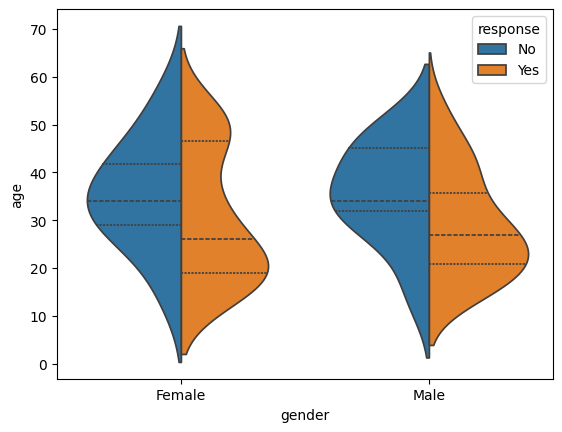

In [ ]:
#Your code
sns.violinplot(data=df_impt,
               x='gender',
               y='age',
               hue='response', #แบ่งสีตามผลการรักษา (สีน้ำเงิน = No/ไม่หาย, สีส้ม = Yes/หาย)
               inner='quartile', # เส้นประยาวตรงกลาง = ค่ามัธยฐาน (Median) 
               split=True) #แสดงเส้นควอไทล์ภายในกราฟ  ฝั่งซ้ายของแกนกลางจะเป็นข้อมูลกลุ่ม No ฝั่งขวาจะเป็นข้อมูลกลุ่ม Yes เส้นประวิ่นบนและล่าง = Quartile ที่ 3 (75%) และ Quartile ที่ 1 (25%)

2. การแปลผลกราฟ (Interpretation)
จากกราฟในรูป image_2e4a6e.png สามารถวิเคราะห์ได้ดังนี้ครับ:

ภาพรวม (Overall)
รูปทรงของกราฟฝั่งสีส้ม (Yes - รักษาหาย) มักจะ "ป่อง" หรือมีน้ำหนักอยู่ด้านล่าง (อายุน้อย) ในขณะที่ฝั่งสีน้ำเงิน (No - ไม่หาย) มักจะป่องด้านบน (อายุมาก)

--------------------------
วิเคราะห์เจาะจงรายเพศ:
เพศหญิง (Female - ด้านซ้ายของรูป):

สีน้ำเงิน (No): การกระจายตัวค่อนข้างสม่ำเสมอ แต่จุดที่หนาที่สุดอยู่ช่วงอายุประมาณ 30-40 ปี

สีส้ม (Yes): ฐานด้านล่างกว้างมาก (Bottom-heavy) จุดที่หนาที่สุดคือช่วงอายุประมาณ 20-25 ปี

สรุป: ในผู้หญิง เห็นได้ชัดเจนว่า คนอายุน้อยรักษาหายง่ายกว่า ส่วนคนอายุมากมักรักษาไม่หาย


----------------------
เพศชาย (Male - ด้านขวาของรูป):

สีน้ำเงิน (No): รูปร่างป่องตรงกลางค่อนไปทางบน (ช่วงอายุ 35-45 ปี) แปลว่าคนรักษามักไม่หายจะกระจุกตัวที่วัยกลางคน

สีส้ม (Yes): รูปร่างค่อนข้างยาวและกระจายตัว (Spread out) แต่จุดศูนย์กลาง (เส้นประมัธยฐาน) ก็ยังต่ำกว่าสีน้ำเงินอยู่ดี

สรุป: ในผู้ชาย แนวโน้มยังคงเป็น อายุน้อยรักษาหายได้ดีกว่า แต่ช่วงอายุของคนที่รักษาหายนั้นกว้างกว่าผู้หญิง (ผู้ชายอายุเยอะที่รักษาหาย มีจำนวนพอมองเห็นได้มากกว่าผู้หญิงอายุเยอะที่รักษาหาย)
----------------------
ข้อสรุปเชิงธุรกิจ/การแพทย์ (Insight)
กราฟนี้ยืนยันสมมติฐานเดิมว่า "อายุ (Age)" เป็นปัจจัยผกผันกับความสำเร็จในการรักษา (ยิ่งอายุน้อย ยิ่งมีโอกาสหายสูง) โดยแนวโน้มนี้เป็นจริงทั้งในเพศชายและหญิงครับ


ShapiroResult(statistic=np.float64(0.9293703357594011), pvalue=np.float64(0.00010961810788104861))

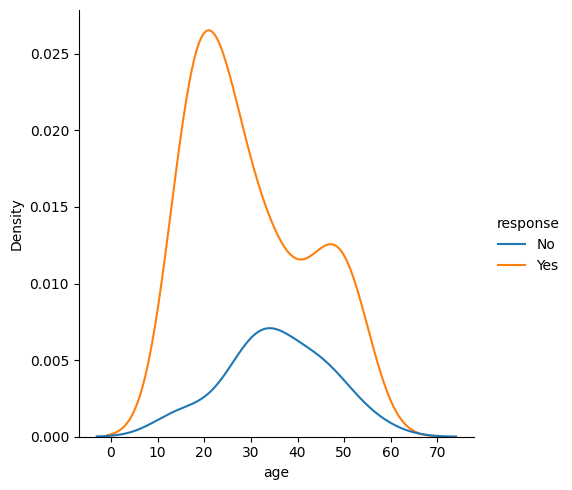

In [18]:
# --- ส่วนที่ 1: สร้างกราฟการกระจายตัว (Visualization) ---
# sns.displot: สร้างกราฟ Distribution (การกระจายตัวของข้อมูล)
# data=df_impt: ใช้ข้อมูลจาก DataFrame ชื่อ df_impt
# x='age': สนใจดูการกระจายตัวของตัวแปร "อายุ"
# kind='kde': เลือกแบบ Kernel Density Estimation (เส้นโค้งความหนาแน่น) แทนที่จะเป็นแท่ง Histogram
# hue='response': แยกเส้นกราฟเป็น 2 สีตามผลการรักษา (Yes/No) เพื่อเทียบกัน
sns.displot(data=df_impt, 
            x='age', 
            kind='kde', 
            hue='response',
            )

# --- ส่วนที่ 2: ทดสอบการแจกแจงปกติ (Statistical Test) ---
# stats.shapiro: ใช้ทดสอบ Shapiro-Wilk Test
# เป้าหมาย: เช็คว่าข้อมูล "อายุ" (age) มีการแจกแจงเป็นรูประฆังคว่ำ (Normal Distribution) หรือไม่?
# ผลลัพธ์: จะได้ค่า (Statistic, p-value)
stats.shapiro(df_impt.age)

2. วิเคราะห์ผลจากกราฟ (KDE Plot)
จากรูปกราฟที่ได้ สามารถอ่านผลได้ดังนี้ครับ:

กลุ่มสีส้ม (Response = Yes / รักษาหาย):

กราฟมีความโด่งสูงมากในช่วงอายุน้อย (จุดยอดพีคอยู่ประมาณอายุ 20-25 ปี)

กราฟมีความเบ้ (Skewed) ไม่สมมาตร คือมีหางลากยาวไปทางขวา และมีเนินเล็กๆ อีกลูกช่วงอายุ 45-50 ปี (ลักษณะคล้าย Bimodal หรือมี 2 ฐานนิยม)

ความหมาย: คนที่รักษาหายส่วนใหญ่กระจุกตัวอยู่ที่กลุ่ม "วัยรุ่น/วัยทำงานตอนต้น"

กลุ่มสีน้ำเงิน (Response = No / รักษาไม่หาย):

จุดยอดพีคอยู่ถัดออกไปทางขวา (ประมาณอายุ 35 ปี)

กราฟดูเตี้ยและแบนกว่า (Spread มากกว่า) แสดงว่าอายุของคนที่รักษาไม่หายมีการกระจายตัวกว้างกว่า

บทสรุปจากภาพ: กราฟนี้ยืนยันชัดเจนว่า อายุมีผลต่อการรักษา โดยกลุ่มอายุน้อยมีโอกาสหาย (ความหนาแน่นสีส้มสูง) มากกว่ากลุ่มอายุมาก

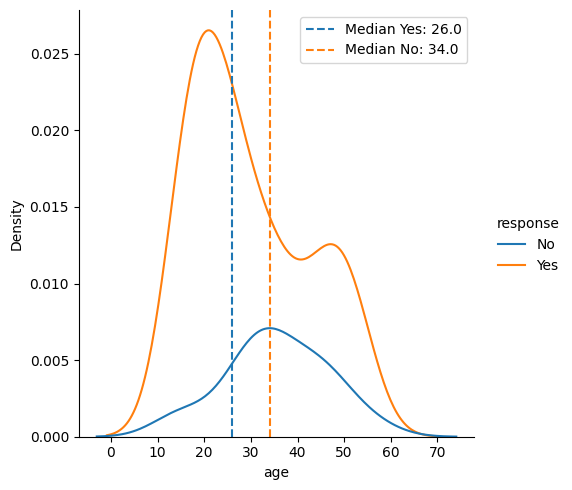

In [23]:
import matplotlib.pyplot as plt

# สร้างกราฟ
g = sns.displot(data=df_impt, 
                x='age', 
                kind='kde', 
                hue='response',
                )

# คำนวณและเพิ่มเส้น median
for response, color in zip(['Yes', 'No'], ['tab:blue', 'tab:orange']):
    median_val = df_impt[df_impt['response'] == response]['age'].median()
    plt.axvline(x=median_val, color=color, linestyle='--', linewidth=1.5, 
                label=f'Median {response}: {median_val:.1f}')

plt.legend()
plt.show()

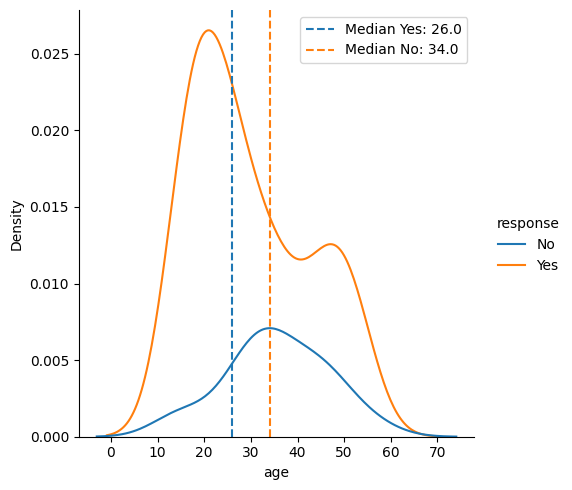

In [24]:
import matplotlib.pyplot as plt

# สร้างกราฟ
g = sns.displot(data=df_impt, 
                x='age', 
                kind='kde', 
                hue='response',
                )

# คำนวณและเพิ่มเส้น median ผ่าน g.ax (axes ของ FacetGrid)
for response, color in zip(['Yes', 'No'], ['tab:blue', 'tab:orange']):
    median_val = df_impt[df_impt['response'] == response]['age'].median()
    g.ax.axvline(x=median_val, color=color, linestyle='--', linewidth=1.5, 
                 label=f'Median {response}: {median_val:.1f}')

g.ax.legend()
plt.show()

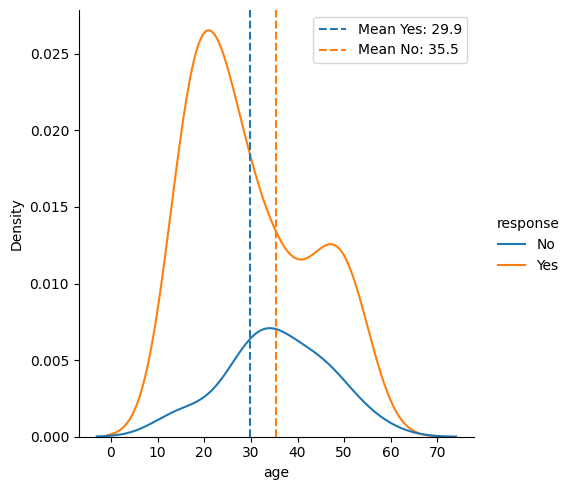

In [25]:
import matplotlib.pyplot as plt

# สร้างกราฟ
g = sns.displot(data=df_impt, 
                x='age', 
                kind='kde', 
                hue='response',
                )

# คำนวณและเพิ่มเส้น mean ผ่าน g.ax (axes ของ FacetGrid)
for response, color in zip(['Yes', 'No'], ['tab:blue', 'tab:orange']):
    mean_val = df_impt[df_impt['response'] == response]['age'].mean()
    g.ax.axvline(x=mean_val, color=color, linestyle='--', linewidth=1.5, 
                 label=f'Mean {response}: {mean_val:.1f}')

g.ax.legend()
plt.show()

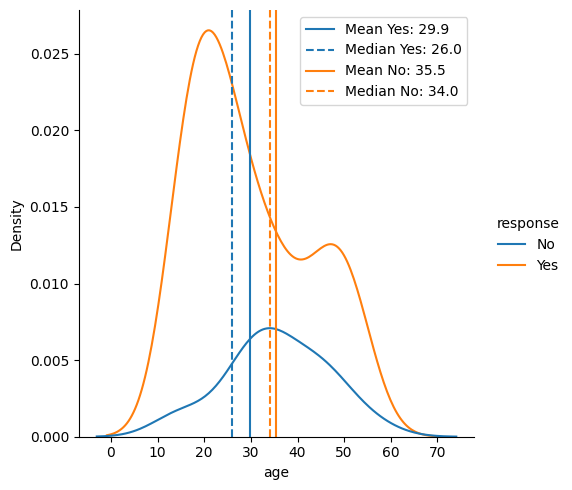

In [26]:
import matplotlib.pyplot as plt

g = sns.displot(data=df_impt, 
                x='age', 
                kind='kde', 
                hue='response',
                )

for response, color in zip(['Yes', 'No'], ['tab:blue', 'tab:orange']):
    mean_val = df_impt[df_impt['response'] == response]['age'].mean()
    median_val = df_impt[df_impt['response'] == response]['age'].median()
    
    # เส้น Mean (เส้นทึบ)
    g.ax.axvline(x=mean_val, color=color, linestyle='-', linewidth=1.5, 
                 label=f'Mean {response}: {mean_val:.1f}')
    # เส้น Median (เส้นประ)
    g.ax.axvline(x=median_val, color=color, linestyle='--', linewidth=1.5, 
                 label=f'Median {response}: {median_val:.1f}')

g.ax.legend()
plt.show()

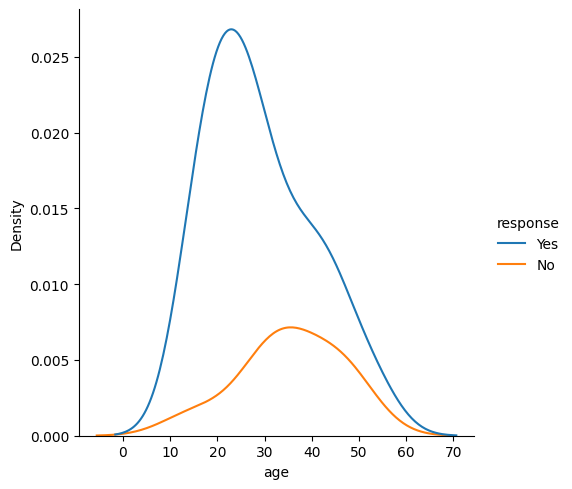

In [21]:
sns.displot(data=df_impt.query('gender=="Male"'), x='age', kind='kde', hue='response')

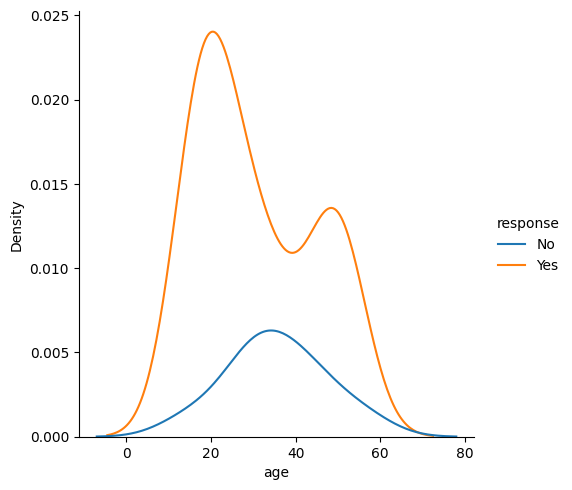

In [27]:
# สร้างกราฟ KDE (Kernel Density Estimation) แสดงการกระจายตัวของอายุ
# - data=df_impt.query('gender=="Female"'): กรองเฉพาะข้อมูลเพศหญิง
# - x='age': แกน X แสดงอายุ
# - kind='kde': ใช้เส้นโค้งความหนาแน่นแทน histogram
# - hue='response': แยกสีตามผลการรักษา (Yes=รักษาหาย, No=รักษาไม่หาย)
sns.displot(data=df_impt.query('gender=="Female"'), x='age', kind='kde', hue='response')

วิเคราะห์กราฟ
1. กลุ่ม Yes (สีส้ม) - รักษาหาย:

มีลักษณะ Bimodal (มี 2 ยอด) ที่อายุประมาณ 20 ปี และ 50 ปี
ยอดแรก (อายุ ~20) สูงกว่ามาก แสดงว่าผู้หญิงอายุน้อยตอบสนองต่อการรักษาดี

2. กลุ่ม No (สีฟ้า) - รักษาไม่หาย:

มีลักษณะ Unimodal (ยอดเดียว) ที่อายุประมาณ 35-40 ปี
การกระจายตัวกว้างกว่า (แบนกว่า)

3. สรุป:

ผู้หญิง อายุน้อย (~20 ปี) มีแนวโน้ม รักษาหาย มากกว่า
ผู้หญิง อายุกลางคน (~35-40 ปี) มีแนวโน้ม รักษาไม่หาย มากกว่า

####  
3. จากกราฟในข้อ 2 จงตอบคำถามต่อไปนี้
- การแจกแจงของกลุ่มตัวอย่างทั้ง 4 กลุ่ม Female-No, Female-Yes, Male-No และ Male-Yes เป็นการแจงแจกแบบปรกติหรือไม่ มีวิธีการทดสอบทางสถิติอย่างไร

<Axes: xlabel='gender', ylabel='age'>

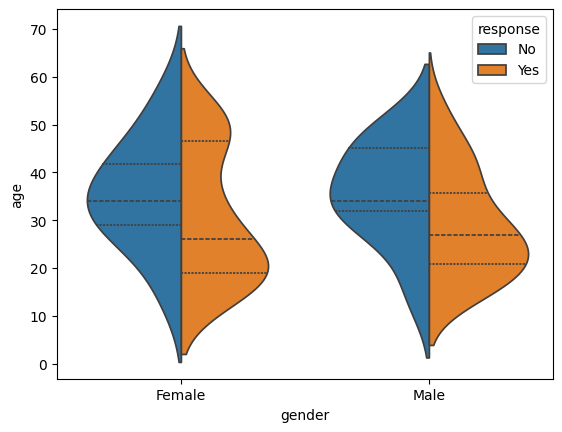

In [28]:
# สร้างกราฟ Violin Plot แสดงการกระจายตัวของอายุ แยกตามเพศและผลการรักษา
# - data=df_impt: ใช้ข้อมูลจาก DataFrame ชื่อ df_impt
# - x='gender': แกน X แบ่งตามเพศ (Male/Female)
# - y='age': แกน Y แสดงอายุ
# - hue='response': แยกสีตามผลการรักษา (Yes=รักษาหาย, No=รักษาไม่หาย)
# - inner='quartile': แสดงเส้น quartile (Q1, Median, Q3) ภายใน violin
# - split=True: แบ่งครึ่ง violin ซ้าย-ขวา เพื่อเปรียบเทียบ Yes/No ในเพศเดียวกัน
sns.violinplot(data=df_impt,
               x='gender',
               y='age',
               hue='response',
               inner='quartile',
               split=True)

####  
3. จากกราฟในข้อ 2 จงตอบคำถามต่อไปนี้
- การแจกแจงของกลุ่มตัวอย่างทั้ง 4 กลุ่ม Female-No, Female-Yes, Male-No และ Male-Yes เป็นการแจงแจกแบบปกติหรือไม่ มีวิธีการทดสอบทางสถิติอย่างไร

\
**Female**  
response=No : normal distribution

In [32]:
# ทดสอบการแจกแจงปกติด้วย Shapiro-Wilk Test
# - stats.shapiro(): ฟังก์ชันทดสอบว่าข้อมูลมีการแจกแจงปกติหรือไม่
# - df_impt.query('gender=="Female" & response=="No"'): กรองเฉพาะผู้หญิงที่รักษาไม่หาย
# - .age: เลือกเฉพาะคอลัมน์อายุมาทดสอบ
stats.shapiro(df_impt.query('gender=="Female" & response=="No"').age)

ShapiroResult(statistic=np.float64(0.9869937751973278), pvalue=np.float64(0.9916383278405223))

H<sub>0</sub>: sample is normal distributed  
H<sub>A</sub>: sample is not normal distributed

แปลผล:

    H₀: ข้อมูลมีการแจกแจงปกติ (Normal Distribution)
    H₁: ข้อมูลไม่มีการแจกแจงปกติ
    p-value = 0.992 > 0.05 → ไม่ปฏิเสธ H₀
สรุป: กลุ่ม Female-No มีการแจกแจงแบบ ปกติ (Normal Distribution) ✓

**Female**\
ทดสอบกลุ่ม Female-Yes \
response=Yes : non-normal distribution

In [ ]:
# ทดสอบการแจกแจงปกติด้วย Shapiro-Wilk Test
# - กรองเฉพาะผู้หญิงที่รักษาหาย (gender=="Female" & response=="Yes")
# - นำอายุมาทดสอบว่าแจกแจงปกติหรือไม่
stats.shapiro(df_impt.query('gender=="Female" & response=="Yes"').age)

ShapiroResult(statistic=np.float64(0.8681075724353784), pvalue=np.float64(0.0003032319466853844))

In [34]:
# ใช้เงื่อนไข & เชื่อมต่อกัน
stats.shapiro(df_impt[(df_impt['gender'] == 'Female') & (df_impt['response'] == 'Yes')]['age'])

ShapiroResult(statistic=np.float64(0.8681075724353784), pvalue=np.float64(0.0003032319466853844))

In [35]:
# ใช้ .loc[] สำหรับ filter แถวและเลือกคอลัมน์
stats.shapiro(df_impt.loc[(df_impt['gender'] == 'Female') & (df_impt['response'] == 'Yes'), 'age'])

ShapiroResult(statistic=np.float64(0.8681075724353784), pvalue=np.float64(0.0003032319466853844))

In [36]:
# filter ทีละเงื่อนไข
female_df = df_impt[df_impt['gender'] == 'Female']
female_yes = female_df[female_df['response'] == 'Yes']
stats.shapiro(female_yes['age'])

ShapiroResult(statistic=np.float64(0.8681075724353784), pvalue=np.float64(0.0003032319466853844))

ผลลัพธ์: ShapiroResult(statistic=0.868, pvalue=0.0003)
แปลผล:

    H₀: ข้อมูลมีการแจกแจงปกติ
    H₁: ข้อมูลไม่มีการแจกแจงปกติ
    p-value = 0.0003 < 0.05 → ปฏิเสธ H₀
สรุป: กลุ่ม Female-Yes มีการแจกแจงแบบ ไม่ปกติ (Non-Normal Distribution) ✗

\
**Male**  
response=No : normal distribution

In [38]:
# ทดสอบการแจกแจงปกติด้วย Shapiro-Wilk Test
# - stats.shapiro(): ฟังก์ชันทดสอบว่าข้อมูลมีการแจกแจงปกติหรือไม่
# - df_impt.query('gender=="Male" & response=="No"'): กรองเฉพาะผู้ชายที่รักษาไม่หาย
# - .age: เลือกเฉพาะคอลัมน์อายุมาทดสอบ
stats.shapiro(df_impt.query('gender=="Male" & response=="No"').age)

ShapiroResult(statistic=np.float64(0.9468334468117184), pvalue=np.float64(0.655359777106307))

ผลลัพธ์: ShapiroResult(statistic=0.947, pvalue=0.655)

แปลผล
รายการค่า\
    H₀ข้อมูลมีการแจกแจงปกติ (Normal Distribution)\
    H₁ข้อมูลไม่มีการแจกแจงปกติ\
    p-value0.655\
    α (ระดับนัยสำคัญ)0.05

การตัดสินใจ: p-value = 0.655 > 0.05 → ไม่ปฏิเสธ H₀ \
    สรุป: กลุ่ม Male-No มีการแจกแจงแบบ ปกติ (Normal Distribution) ✓


\
**Male**  
response=Yes : non-normal distribution (nearly normal)

In [40]:
# ทดสอบการแจกแจงปกติด้วย Shapiro-Wilk Test
# - stats.shapiro(): ฟังก์ชันทดสอบว่าข้อมูลมีการแจกแจงปกติหรือไม่
# - df_impt.query('gender=="Male" & response=="Yes"'): กรองเฉพาะผู้ชายที่รักษาหาย
# - .age: เลือกเฉพาะคอลัมน์อายุมาทดสอบ
stats.shapiro(df_impt.query('gender=="Male" & response=="Yes"').age)

ShapiroResult(statistic=np.float64(0.9319163499754242), pvalue=np.float64(0.04429689619748405))

แปลผล
สมมติฐาน:

H₀: ข้อมูลมีการแจกแจงปกติ (Normal Distribution)
H₁: ข้อมูลไม่มีการแจกแจงปกติ

ผลการทดสอบ:

p-value = 0.044
α (ระดับนัยสำคัญ) = 0.05

การตัดสินใจ: p-value = 0.044 < 0.05 → ปฏิเสธ H₀
สรุป: กลุ่ม Male-Yes มีการแจกแจงแบบ ไม่ปกติ (Non-Normal Distribution)

In [43]:
pd.crosstab(df_impt['gender'], df_impt['response'], margins=True)

response,No,Yes,All
gender,,,
Female,10,39,49
Male,9,32,41
All,19,71,90


method="exact" คืออะไร?\
เป็นวิธีคำนวณ p-value โดยการคำนวณความน่าจะเป็นจาก ทุกกรณีที่เป็นไปได้ (Exact Permutation) ของการจัดเรียงข้อมูล ทำให้ได้ค่า p-value ที่แม่นยำที่สุด\
- "exact"คำนวณทุกกรณีที่เป็นไปได้n ≤ 20-30 ต่อกลุ่ม
- "asymptotic"ใช้การประมาณแบบ Normal Distributionn > 30 ต่อกลุ่ม
- "auto" (default)เลือกอัตโนมัติตามขนาดตัวอย่างทั่วไป

# ค่าเฉลี่ยของอายุในกลุ่มตัวอย่าง Female-No แตกต่างจากค่าเฉลี่ยในกลุ่มตัวอย่าง Female-Yes อย่างมีนัยสำคัญหรือไม่ มีวิธีการทดสอบอย่างไร และควรตั้งสมมุติฐานอย่างไร

\
**Female response=No vs. response=Yes**

***Hypothesis***  
H<sub>0</sub>: the actual difference between means is equal to 0  
H<sub>A</sub>: the actual difference between means is ***not*** equal to 0

ทำไมใช้ Mann-Whitney U Test?
จากการทดสอบ Shapiro-Wilk ก่อนหน้า:

- Female-No → Normal ✓
- Female-Yes → Non-Normal ✗

เนื่องจากมีกลุ่มที่ไม่เป็น Normal Distribution จึงต้องใช้ Non-parametric test คือ Mann-Whitney U Test แทน Independent t-test

In [ ]:
# ทดสอบความแตกต่างของค่าเฉลี่ยอายุระหว่าง 2 กลุ่มด้วย Mann-Whitney U Test
# - stats.mannwhitneyu(): ใช้เมื่อข้อมูลอย่างน้อย 1 กลุ่มไม่เป็น Normal Distribution
# - กลุ่มที่ 1: ผู้หญิงที่รักษาไม่หาย (Female & response=="No")
# - กลุ่มที่ 2: ผู้หญิงที่รักษาหาย (Female & response=="Yes")
# - method="exact": คำนวณ p-value แบบแม่นยำ (เหมาะสำหรับกลุ่มตัวอย่างขนาดเล็ก)


u_score, p_value = stats.mannwhitneyu(df_impt.query('gender=="Female" & response=="No"').age,
                                      df_impt.query('gender=="Female" & response=="Yes"').age,
                                      method="exact")
print("u-score:", u_score)
print("p-value:", p_value)

u-score: 243.0
p-value: 0.24283071084318192


p-value > 0.05, fail to reject H<sub>0</sub>

แปลผล
สมมติฐาน:

- H₀: ค่าเฉลี่ยอายุของกลุ่ม Female-No และ Female-Yes ไม่แตกต่างกัน
- H₁: ค่าเฉลี่ยอายุของกลุ่ม Female-No และ Female-Yes แตกต่างกัน

ผลการทดสอบ:

- U-score = 243.0
- p-value = 0.243

การตัดสินใจ:

- ถ้า p-value < 0.05 → ปฏิเสธ H₀ → ค่าเฉลี่ยอายุแตกต่างกันอย่างมีนัยสำคัญ
- ถ้า p-value ≥ 0.05 → ไม่ปฏิเสธ H₀ → ค่าเฉลี่ยอายุไม่แตกต่างกัน

การตัดสินใจ: p-value = 0.243 > 0.05 → ไม่ปฏิเสธ H₀ \
สรุป: ค่าเฉลี่ยอายุของกลุ่ม Female-No และ Female-Yes ไม่แตกต่างกัน อย่างมีนัยสำคัญทางสถิติ

####  
- ค่าเฉลี่ยของอายุในกลุ่มตัวอย่าง Male-No แตกต่างจากค่าเฉลี่ยในกลุ่มตัวอย่าง Male-Yes อย่างมีนัยสำคัญหรือไม่ มีวิธีการทดสอบอย่างไร และควรตั้งสมมุติฐานอย่างไร

\
**Male response=No vs. response=Yes**

***Hypothesis***  
H<sub>0</sub>: the actual difference between means is equal to 0  
H<sub>A</sub>: the actual difference between means is ***not*** equal to 0

In [ ]:
# ทดสอบความแตกต่างของค่าเฉลี่ยอายุระหว่าง 2 กลุ่มด้วย Mann-Whitney U Test
# - stats.mannwhitneyu(): ใช้เมื่อข้อมูลอย่างน้อย 1 กลุ่มไม่เป็น Normal Distribution
# - กลุ่มที่ 1: ผู้ชายที่รักษาไม่หาย (Male & response=="No")
# - กลุ่มที่ 2: ผู้ชายที่รักษาหาย (Male & response=="Yes")
# - method="exact": คำนวณ p-value แบบแม่นยำ (เหมาะสำหรับกลุ่มตัวอย่างขนาดเล็ก)
u_score, p_value = stats.mannwhitneyu(df_impt.query('gender=="Male" & response=="No"').age,
                                      df_impt.query('gender=="Male" & response=="Yes"').age,
                                      method="exact")
print("u-score:", u_score)
print("p-value:", p_value)

u-score: 194.5
p-value 0.1203109753136182


p-value > 0.05, fail to reject H<sub>0</sub>

ทำไมใช้ Mann-Whitney U Test?\
จากการทดสอบ Shapiro-Wilk ก่อนหน้า:

- Male-No → Normal ✓
- Male-Yes → Non-Normal ✗

เนื่องจากมีกลุ่มที่ไม่เป็น Normal Distribution จึงต้องใช้ Non-parametric test คือ Mann-Whitney U Test แทน Independent t-test

แปลผล\
สมมติฐาน:

- H₀: ค่าเฉลี่ยอายุของกลุ่ม Male-No และ Male-Yes ไม่แตกต่างกัน
- H₁: ค่าเฉลี่ยอายุของกลุ่ม Male-No และ Male-Yes แตกต่างกัน

ผลการทดสอบ:

- U-score = 194.5
- p-value = 0.120

การตัดสินใจ: p-value = 0.120 > 0.05 → ไม่ปฏิเสธ H₀\
สรุป: ค่าเฉลี่ยอายุของกลุ่ม Male-No และ Male-Yes ไม่แตกต่างกัน อย่างมีนัยสำคัญทางสถิติ

####  
- ค่าเฉลี่ยของอายุในกลุ่มตัวอย่าง Female-No แตกต่างจากค่าเฉลี่ยในกลุ่มตัวอย่าง Male-No อย่างมีนัยสำคัญหรือไม่ มีวิธีการทดสอบอย่างไร และควรตั้งสมมุติฐานอย่างไร

\
**Female response=No vs. Male response=No**

***Hypothesis***  
H<sub>0</sub>: the actual difference between means is equal to 0  
H<sub>A</sub>: the actual difference between means is ***not*** equal to 0

In [47]:
# ทดสอบความแตกต่างของค่าเฉลี่ยอายุระหว่าง 2 กลุ่มด้วย Independent t-test
# - stats.ttest_ind(): ใช้เมื่อข้อมูลทั้ง 2 กลุ่มเป็น Normal Distribution
# - a: กลุ่มผู้หญิงที่รักษาไม่หาย (Female & response=="No")
# - b: กลุ่มผู้ชายที่รักษาไม่หาย (Male & response=="No")
# - equal_var=True: สมมติว่า variance ของ 2 กลุ่มเท่ากัน (Student's t-test)
# - alternative='two-sided': ทดสอบแบบ 2 หาง (แตกต่างกันทั้งมากกว่าและน้อยกว่า)
t_score, p_value = stats.ttest_ind(a=df_impt.query('gender=="Female" & response=="No"').age,
                                   b=df_impt.query('gender=="Male" & response=="No"').age,
                                   equal_var=True,
                                   alternative='two-sided')
print("t-score:", t_score)
print("p-value:", p_value)

t-score: 0.010851277467950823
p-value: 0.991468431339334


p-value > 0.05, fail to reject H<sub>0</sub>

ทำไมใช้ Independent t-test?\
จากการทดสอบ Shapiro-Wilk ก่อนหน้า:

- Female-No → Normal ✓
- Male-No → Normal ✓

เนื่องจากทั้ง 2 กลุ่มมีการแจกแจงแบบ Normal Distribution จึงใช้ Parametric test คือ Independent t-test ได้\
แปลผล\
สมมติฐาน:\

  - H₀: ค่าเฉลี่ยอายุของกลุ่ม Female-No และ Male-No ไม่แตกต่างกัน
  - H₁: ค่าเฉลี่ยอายุของกลุ่ม Female-No และ Male-No แตกต่างกัน

ผลการทดสอบ:\

  - t-score = 0.011
  - p-value = 0.991

การตัดสินใจ: p-value = 0.991 > 0.05 → ไม่ปฏิเสธ H₀\
สรุป: ค่าเฉลี่ยอายุของกลุ่ม Female-No และ Male-No ไม่แตกต่างกัน อย่างมีนัยสำคัญทางสถิติ

####  
- ค่าเฉลี่ยของอายุในกลุ่มตัวอย่าง Female-Yes แตกต่างจากค่าเฉลี่ยในกลุ่มตัวอย่าง Male-Yes อย่างมีนัยสำคัญหรือไม่ มีวิธีการทดสอบอย่างไร และควรตั้งสมมุติฐานอย่างไร

\
**Female response=Yes vs. Male response=Yes**

***Hypothesis***  
H<sub>0</sub>: the actual difference between means is equal to 0  
H<sub>A</sub>: the actual difference between means is ***not*** equal to 0

In [49]:
# ทดสอบความแตกต่างของค่าเฉลี่ยอายุระหว่าง 2 กลุ่มด้วย Mann-Whitney U Test
# - stats.mannwhitneyu(): ใช้เมื่อข้อมูลอย่างน้อย 1 กลุ่มไม่เป็น Normal Distribution
# - กลุ่มที่ 1: ผู้หญิงที่รักษาหาย (Female & response=="Yes")
# - กลุ่มที่ 2: ผู้ชายที่รักษาหาย (Male & response=="Yes")
# - method="exact": คำนวณ p-value แบบแม่นยำ (เหมาะสำหรับกลุ่มตัวอย่างขนาดเล็ก)
u_score, p_value = stats.mannwhitneyu(df_impt.query('gender=="Female" & response=="Yes"').age,
                                      df_impt.query('gender=="Male" & response=="Yes"').age,
                                      method="exact")
print("u-score:", u_score)
print("p-value:", p_value)

u-score: 639.0
p-value: 0.8677696623734067


p-value > 0.05, fail to reject H<sub>0</sub>

ทำไมใช้ Mann-Whitney U Test?\
จากการทดสอบ Shapiro-Wilk ก่อนหน้า:\

- Female-Yes → Non-Normal ✗
- Male-Yes → Non-Normal ✗

เนื่องจากทั้ง 2 กลุ่มไม่เป็น Normal Distribution จึงต้องใช้ Non-parametric test คือ Mann-Whitney U Test แทน Independent t-test\
แปลผล\
สมมติฐาน:\

- H₀: ค่าเฉลี่ยอายุของกลุ่ม Female-Yes และ Male-Yes ไม่แตกต่างกัน
- H₁: ค่าเฉลี่ยอายุของกลุ่ม Female-Yes และ Male-Yes แตกต่างกัน

ผลการทดสอบ:\

- U-score = 639.0
- p-value = 0.868

การตัดสินใจ: p-value = 0.868 > 0.05 → ไม่ปฏิเสธ H₀\
สรุป: ค่าเฉลี่ยอายุของกลุ่ม Female-Yes และ Male-Yes ไม่แตกต่างกัน อย่างมีนัยสำคัญทางสถิติ

####  
3. แสดงวิธีการเพื่อให้ได้มาซึ่งกราฟด้านล่างนี้

3.1

item3.1.svg

<Axes: xlabel='type', ylabel='time'>

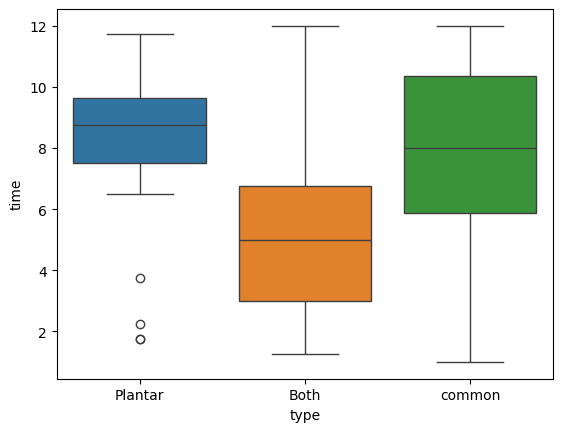

In [50]:
# สร้างกราฟ Box Plot แสดงการกระจายตัวของระยะเวลาที่เป็นโรค แยกตามประเภทหูด
# - data=df_impt: ใช้ข้อมูลจาก DataFrame ชื่อ df_impt
# - x='type': แกน X แบ่งตามประเภทหูด (Plantar/common/Both)
# - y='time': แกน Y แสดงระยะเวลาที่เป็นโรคก่อนรักษา (เดือน)
# - hue='type': แยกสีตามประเภทหูด (ซ้ำกับ x เพื่อให้แต่ละกล่องมีสีต่างกัน)
sns.boxplot(data=df_impt,
           x='type',
           y='time',
           hue='type')

หมายเหตุ
การใช้ hue='type' ซ้ำกับ x='type' จะทำให้แต่ละกล่องมีสีแตกต่างกัน ซึ่งช่วยให้อ่านกราฟง่ายขึ้น แต่ถ้าต้องการเพิ่มมิติข้อมูล สามารถเปลี่ยน hue เป็นตัวแปรอื่นได้ เช่น:

<Axes: xlabel='type', ylabel='time'>

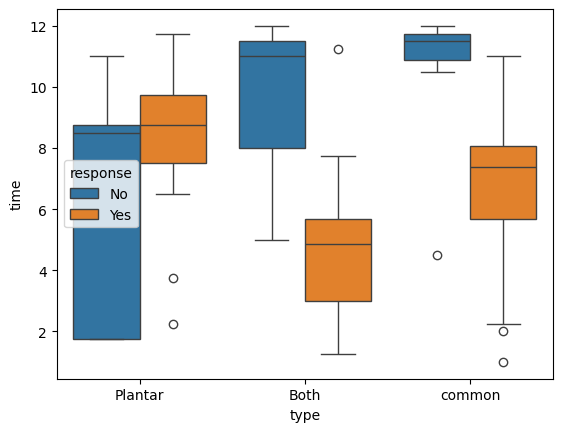

In [51]:
# แยกสีตามผลการรักษาแทน
sns.boxplot(data=df_impt,
           x='type',
           y='time',
           hue='response')

แปลผลกราฟ Box Plot
ภาพรวม: กราฟแสดงการกระจายตัวของระยะเวลาที่เป็นโรค (time) แยกตามประเภทหูด (type) และผลการรักษา (response)

1. กลุ่ม Plantar (หูดฝ่าเท้า):

No (สีฟ้า): Median ≈ 8.5 เดือน, กระจายตัวกว้าง (2-11 เดือน)
Yes (สีส้ม): Median ≈ 9 เดือน, กระจายตัวกว้างคล้ายกัน
ทั้ง 2 กลุ่มมีการกระจายตัวใกล้เคียงกัน

2. กลุ่ม Both (หูดทั้ง 2 แบบ):

No (สีฟ้า): Median ≈ 11 เดือน, กระจายตัวแคบ อยู่ในช่วง 10-12 เดือน
Yes (สีส้ม): Median ≈ 5 เดือน, กระจายตัวกว้างกว่า มี outlier ที่ 11 เดือน
ความแตกต่างชัดเจน: กลุ่มที่รักษาหายมีระยะเวลาเป็นโรคสั้นกว่ามาก

3. กลุ่ม common (หูดธรรมดา):

No (สีฟ้า): Median ≈ 11 เดือน, กระจายตัวแคบ
Yes (สีส้ม): Median ≈ 7.5 เดือน, กระจายตัวกว้างกว่า มี outliers
ความแตกต่างชัดเจน: กลุ่มที่รักษาหายมีระยะเวลาเป็นโรคสั้นกว่า


สรุป:

ผู้ป่วยที่เป็นโรค ระยะเวลาสั้น มีแนวโน้ม รักษาหาย มากกว่า (โดยเฉพาะกลุ่ม Both และ common)
กลุ่ม Plantar ระยะเวลาเป็นโรคไม่ค่อยมีผลต่อการรักษา
กลุ่มที่รักษาไม่หาย (No) มักเป็นโรคมานาน (Median สูงกว่า)
Incognito chats aren’t saved, added to memory, or used to train models.

\
3.2

item3.2.svg

<Axes: xlabel='type', ylabel='time'>

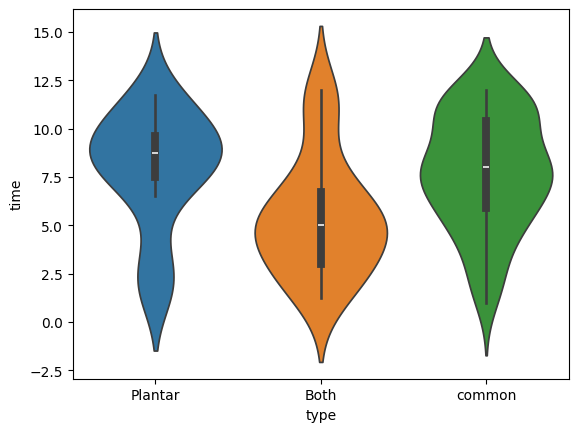

In [52]:
# สร้างกราฟ Violin Plot แสดงการกระจายตัวของระยะเวลาที่เป็นโรค แยกตามประเภทหูด
# - data=df_impt: ใช้ข้อมูลจาก DataFrame ชื่อ df_impt
# - x='type': แกน X แบ่งตามประเภทหูด (Plantar/Both/common)
# - y='time': แกน Y แสดงระยะเวลาที่เป็นโรคก่อนรักษา (เดือน)
# - hue='type': แยกสีตามประเภทหูด (ทำให้แต่ละ violin มีสีต่างกัน)
sns.violinplot(data=df_impt,
           x='type',
           y='time',
           hue='type')

แปลผลกราฟ
1. กลุ่ม Plantar (สีฟ้า):

Median ≈ 9 เดือน
การกระจายตัวแบบ Bimodal (มี 2 ยอด) ที่ประมาณ 7-8 และ 10-11 เดือน
ช่วงข้อมูล: 2-15 เดือน

2. กลุ่ม Both (สีส้ม):

Median ≈ 5 เดือน
การกระจายตัวแบบ Unimodal ยอดเดียวที่ประมาณ 5 เดือน
ช่วงข้อมูล: 1-15 เดือน
มีความหนาแน่นสูงที่ระยะเวลาสั้น

3. กลุ่ม common (สีเขียว):

Median ≈ 8 เดือน
การกระจายตัว กว้างที่สุด มียอดที่ประมาณ 7-8 และ 11 เดือน
ช่วงข้อมูล: 0-15 เดือน


สรุป:

กลุ่ม Both มีระยะเวลาเป็นโรคสั้นที่สุด (Median ต่ำสุด)
กลุ่ม Plantar มีระยะเวลาเป็นโรคนานที่สุด
กลุ่ม common มีการกระจายตัวกว้างที่สุด

<Axes: xlabel='type', ylabel='time'>

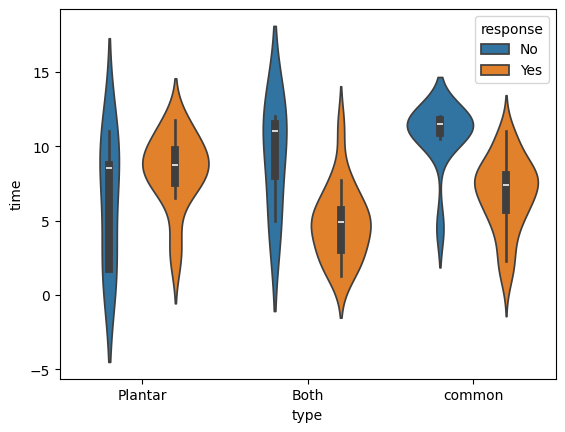

In [54]:
# สร้างกราฟ Violin Plot แสดงการกระจายตัวของระยะเวลาที่เป็นโรค แยกตามประเภทหูดและผลการรักษา
# - data=df_impt: ใช้ข้อมูลจาก DataFrame ชื่อ df_impt
# - x='type': แกน X แบ่งตามประเภทหูด (Plantar/Both/common)
# - y='time': แกน Y แสดงระยะเวลาที่เป็นโรคก่อนรักษา (เดือน)
# - hue='response': แยกสีตามผลการรักษา (No=รักษาไม่หาย, Yes=รักษาหาย)
sns.violinplot(data=df_impt, x='type', y='time', hue='response')

แปลผลกราฟ
1. กลุ่ม Plantar (หูดฝ่าเท้า):

No (สีฟ้า): กระจายตัวกว้างมาก (2-17 เดือน), มี 2 ยอดที่ประมาณ 2 และ 10 เดือน
Yes (สีส้ม): กระจายตัวแคบกว่า, Median ≈ 9 เดือน
ความแตกต่างไม่ชัดเจนมาก

2. กลุ่ม Both (หูดทั้ง 2 แบบ):

No (สีฟ้า): Median ≈ 11 เดือน, กระจายตัวกว้าง
Yes (สีส้ม): Median ≈ 5 เดือน, กระจายตัวแคบกว่า
ความแตกต่างชัดเจน: กลุ่มรักษาหายเป็นโรคระยะสั้นกว่า

3. กลุ่ม common (หูดธรรมดา):

No (สีฟ้า): Median ≈ 11 เดือน, กระจายตัวแคบมาก
Yes (สีส้ม): Median ≈ 8 เดือน, กระจายตัวกว้างกว่า
ความแตกต่างชัดเจน: กลุ่มรักษาหายเป็นโรคระยะสั้นกว่า


สรุป:

กลุ่ม Both และ common: ผู้ป่วยที่เป็นโรค ระยะสั้น มีแนวโน้ม รักษาหาย มากกว่า
กลุ่ม Plantar: ระยะเวลาเป็นโรคไม่ค่อยมีผลต่อการรักษา
กลุ่มที่รักษาไม่หาย (No) มักมี Median สูงกว่า (เป็นโรคนานกว่า)

\
3.3

item3.3.svg

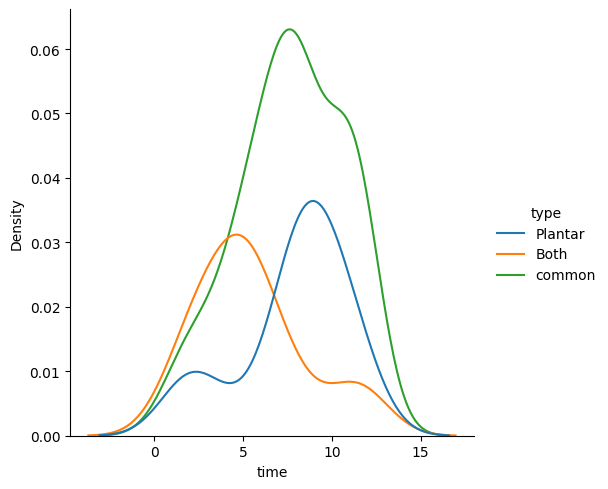

In [55]:
# สร้างกราฟ KDE (Kernel Density Estimation) แสดงการกระจายตัวของระยะเวลาที่เป็นโรค
# - data=df_impt: ใช้ข้อมูลจาก DataFrame ชื่อ df_impt
# - x='time': แกน X แสดงระยะเวลาที่เป็นโรคก่อนรักษา (เดือน)
# - kind='kde': ใช้เส้นโค้งความหนาแน่นแทน histogram
# - hue='type': แยกสีตามประเภทหูด (Plantar/Both/common)
sns.displot(data=df_impt,
            x='time',
            kind='kde',
            hue='type')

แปลผลกราฟ
1. กลุ่ม Plantar (สีฟ้า):

การกระจายตัวแบบ Bimodal (มี 2 ยอด) ที่ประมาณ 3 และ 10 เดือน
กระจายตัวกว้าง (0-15 เดือน)
Density ต่ำสุด แสดงว่ามีจำนวนตัวอย่างน้อย

2. กลุ่ม Both (สีส้ม):

การกระจายตัวแบบ Unimodal ยอดเดียวที่ประมาณ 4-5 เดือน
ส่วนใหญ่เป็นโรคระยะสั้น
มีหางยาวไปทางขวา (right-skewed)

3. กลุ่ม common (สีเขียว):

การกระจายตัวแบบ Bimodal ที่ประมาณ 8 และ 11 เดือน
Density สูงที่สุด แสดงว่ามีจำนวนตัวอย่างมากที่สุด
ส่วนใหญ่เป็นโรคระยะนาน (7-12 เดือน)


สรุป:

กลุ่ม Both มีระยะเวลาเป็นโรค สั้นที่สุด (ยอดอยู่ที่ 4-5 เดือน)
กลุ่ม common มีระยะเวลาเป็นโรค นานที่สุด (ยอดอยู่ที่ 8-11 เดือน)
กลุ่ม Plantar มีการกระจายตัวหลากหลาย ไม่มีรูปแบบชัดเจน

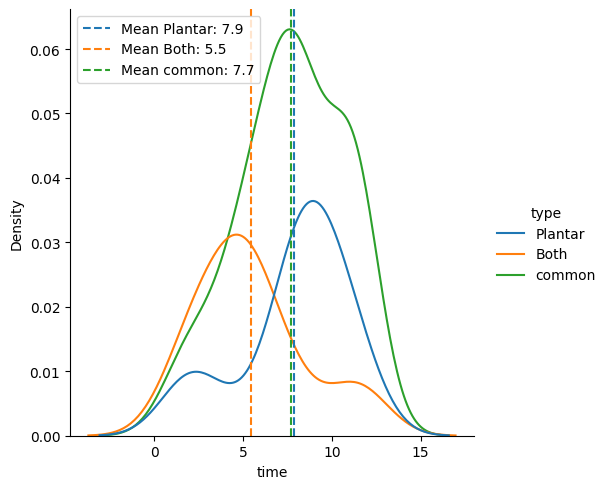

In [56]:
sns.displot(data=df_impt,
            x='time',
            kind='kde',
            hue='type')

# เพิ่มเส้น Mean ของแต่ละ type
colors = {'Plantar': 'tab:blue', 'Both': 'tab:orange', 'common': 'tab:green'}
for type_name, color in colors.items():
    mean_val = df_impt[df_impt['type'] == type_name]['time'].mean()
    plt.axvline(x=mean_val, color=color, linestyle='--', linewidth=1.5,
                label=f'Mean {type_name}: {mean_val:.1f}')

plt.legend()
plt.show()

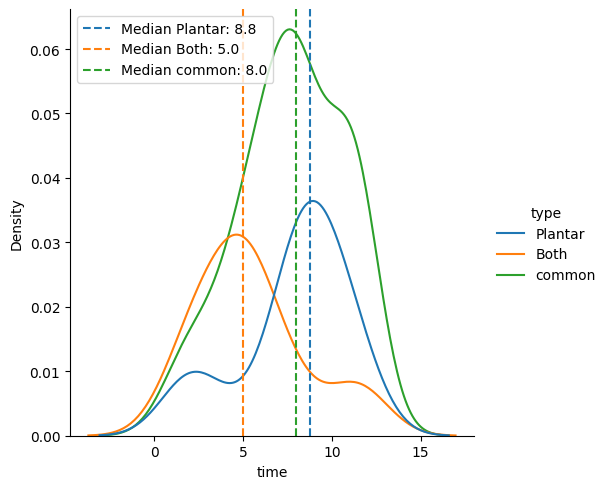

In [57]:
sns.displot(data=df_impt,
            x='time',
            kind='kde',
            hue='type')

colors = {'Plantar': 'tab:blue', 'Both': 'tab:orange', 'common': 'tab:green'}
for type_name, color in colors.items():
    median_val = df_impt[df_impt['type'] == type_name]['time'].median()
    plt.axvline(x=median_val, color=color, linestyle='--', linewidth=1.5,
                label=f'Median {type_name}: {median_val:.1f}')

plt.legend()
plt.show()

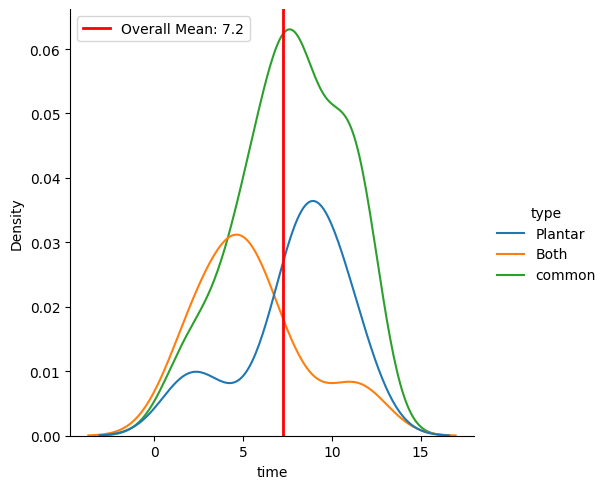

In [58]:
sns.displot(data=df_impt,
            x='time',
            kind='kde',
            hue='type')

overall_mean = df_impt['time'].mean()
plt.axvline(x=overall_mean, color='red', linestyle='-', linewidth=2,
            label=f'Overall Mean: {overall_mean:.1f}')

plt.legend()
plt.show()

\
4. จากกราฟข้อ 3.1, 3.2, 3.3 \
   การแจกแจงของค่า time ในกลุ่มตัวอย่างแยกตาม type คือ \
   Plantar, common, และ Both \
   เป็นการแจงแจกแบบปรกติหรือไม่ มีวิธีการทดสอบทางสถิติอย่างไร

\
***type=Plantar : non-normal distribution***

อธิบาย type=Plantar : non-normal distribution
หมายถึง: ข้อมูลระยะเวลาที่เป็นโรค (time) ของกลุ่มผู้ป่วยที่เป็นหูดประเภท Plantar (หูดฝ่าเท้า) มีการแจกแจงแบบ ไม่ปกติ

Non-Normal Distribution คือ:

ข้อมูลไม่ได้กระจายตัวเป็นรูประฆังคว่ำ (Bell Curve)
อาจเบ้ซ้าย เบ้ขวา หรือมีหลายยอด (Bimodal)

สอดคล้องกับกราฟ KDE ก่อนหน้า:

กลุ่ม Plantar มีลักษณะ Bimodal (2 ยอด) ที่ประมาณ 3 และ 10 เดือน
จึงไม่เป็น Normal Distribution

In [ ]:
# ทดสอบการแจกแจงปกติด้วย Shapiro-Wilk Test
# - stats.shapiro(): ฟังก์ชันทดสอบว่าข้อมูลมีการแจกแจงปกติหรือไม่
# - df_impt[df_impt.type=='Plantar']: กรองเฉพาะกลุ่มหูดฝ่าเท้า (Plantar)
# - .time: เลือกเฉพาะคอลัมน์ระยะเวลาที่เป็นโรคมาทดสอบ
stats.shapiro(df_impt[df_impt.type=='Plantar'].time)

ShapiroResult(statistic=np.float64(0.8656671864195405), pvalue=np.float64(0.006508248593987515))

แปลผล\
สมมติฐาน:

- H₀: ข้อมูลมีการแจกแจงปกติ (Normal Distribution)
- H₁: ข้อมูลไม่มีการแจกแจงปกติ

ผลการทดสอบ:

- Statistic = 0.866
- p-value = 0.0065

การตัดสินใจ: p-value = 0.0065 < 0.05 → ปฏิเสธ H₀\
สรุป: กลุ่ม Plantar มีการแจกแจงแบบ ไม่ปกติ (Non-Normal Distribution)

\
type=common : normal distribution (nearly non-normal)

In [60]:
stats.shapiro(df_impt[df_impt.type=='common'].time)

ShapiroResult(statistic=np.float64(0.9553052494039019), pvalue=np.float64(0.07006982798579209))

แปลผล\
สมมติฐาน:

- H₀: ข้อมูลมีการแจกแจงปกติ (Normal Distribution)
- H₁: ข้อมูลไม่มีการแจกแจงปกติ

ผลการทดสอบ:

- Statistic = 0.955
- p-value = 0.070

การตัดสินใจ: p-value = 0.070 > 0.05 → ไม่ปฏิเสธ H₀\
สรุป: กลุ่ม common มีการแจกแจงแบบ ปกติ (Normal Distribution)\
หมายเหตุ: p-value = 0.070 ใกล้ 0.05 มาก ถือว่า เกือบไม่ปกติ (Borderline) ควรระวังในการตีความครับ

\
type=Both : normal distribution (nearly non-normal)

In [61]:
stats.shapiro(df_impt[df_impt.type=='Both'].time)

ShapiroResult(statistic=np.float64(0.9113236776210308), pvalue=np.float64(0.058318588302714046))

แปลผล\
สมมติฐาน:

- H₀: ข้อมูลมีการแจกแจงปกติ (Normal Distribution)
- H₁: ข้อมูลไม่มีการแจกแจงปกติ

ผลการทดสอบ:

- Statistic = 0.911
- p-value = 0.058

การตัดสินใจ: p-value = 0.058 > 0.05 → ไม่ปฏิเสธ H₀\
สรุป: กลุ่ม Both มีการแจกแจงแบบ ปกติ (Normal Distribution)\
หมายเหตุ: p-value = 0.058 ใกล้ 0.05 มาก ถือว่า เกือบไม่ปกติ (Borderline) ควรระวังในการตีความครับ

\
5. จากกราฟข้อ 3.1, 3.2, 3.3 \
   ค่าเฉลี่ย time ในกลุ่มตัวอย่างแยกตาม type คือ Plantar, common, และ Both \
   มีความแตกต่างกันอย่างมีนัยสำคัญหรือไม่ มีวิธีการทดสอบทางสถิติอย่างไร \
   โดยให้แสดงวิธีเปรียบเทียบแบบพร้อมกันทั้ง 3 กลุ่ม \
   แล้วจึงแสดงวิธีการใช้ pos hoc test

\
Perform Kruskal–Wallis test

H<sub>0</sub>: there is no difference in the means.  
H<sub>A</sub>: there is difference in the means.

In [63]:
# ทดสอบความแตกต่างของค่าเฉลี่ย time ระหว่าง 3 กลุ่มด้วย Kruskal-Wallis Test
# - stats.kruskal(): ใช้เมื่อข้อมูลอย่างน้อย 1 กลุ่มไม่เป็น Normal Distribution
# - เปรียบเทียบ 3 กลุ่มพร้อมกัน: Plantar, common, Both
f_score, p_value = stats.kruskal(df_impt[df_impt.type=='Plantar'].time,
                                 df_impt[df_impt.type=='common'].time,
                                 df_impt[df_impt.type=='Both'].time)
print("F-score:", f_score)
print("p-value:", p_value)

F-score: 9.461481927281019
p-value: 0.008819933367999914


p-value < 0.05, reject H<sub>0</sub> and accept H<sub>A</sub>

ทำไมใช้ Kruskal-Wallis Test?\
จากการทดสอบ Shapiro-Wilk ก่อนหน้า:

- Plantar → Non-Normal ✗
- common → Normal (Borderline) ✓
- Both → Normal (Borderline) ✓

เนื่องจากมีกลุ่มที่ไม่เป็น Normal Distribution จึงต้องใช้ Non-parametric test คือ Kruskal-Wallis Test แทน One-way ANOVA
แปลผล\
สมมติฐาน:

- H₀: ค่าเฉลี่ย time ของทั้ง 3 กลุ่มไม่แตกต่างกัน
- H₁: ค่าเฉลี่ย time ของทั้ง 3 กลุ่มแตกต่างกัน

ผลการทดสอบ:

- H-score = 9.461
- p-value = 0.0088

การตัดสินใจ: p-value = 0.0088 < 0.05 → ปฏิเสธ H₀\
สรุป: ค่าเฉลี่ย time ของทั้ง 3 กลุ่ม แตกต่างกัน อย่างมีนัยสำคัญทางสถิติ

Perform pos hoc test

In [64]:
# ทำ Post Hoc Test ด้วย Conover's Test
# - sp.posthoc_conover(): ใช้หลังจาก Kruskal-Wallis Test พบความแตกต่าง
# - val_col='time': ตัวแปรที่ต้องการเปรียบเทียบ
# - group_col='type': ตัวแปรที่ใช้แบ่งกลุ่ม
sp.posthoc_conover(df_impt, val_col='time', group_col='type')

,Both,Plantar,common
Both,1.000000,0.005820,0.004522
Plantar,0.005820,1.000000,0.706786
common,0.004522,0.706786,1.000000


แปลผล Post Hoc Test
เปรียบเทียบรายคู่:

- Both vs Plantar: p-value = 0.0058 → แตกต่างกัน อย่างมีนัยสำคัญ
- Both vs common: p-value = 0.0045 → แตกต่างกัน อย่างมีนัยสำคัญ
- Plantar vs common: p-value = 0.7068 → ไม่แตกต่างกัน

สรุป:

- กลุ่ม Both แตกต่างจากกลุ่ม Plantar อย่างมีนัยสำคัญ (p = 0.0058)
- กลุ่ม Both แตกต่างจากกลุ่ม common อย่างมีนัยสำคัญ (p = 0.0045)
- กลุ่ม Plantar และ common ไม่แตกต่างกัน (p = 0.7068)

ข้อสรุปรวม: ผู้ป่วยกลุ่ม Both มีระยะเวลาเป็นโรค (time) แตกต่างจากอีก 2 กลุ่มอย่างชัดเจน โดยจากกราฟก่อนหน้าพบว่ากลุ่ม Both มีระยะเวลาเป็นโรค สั้นกว่า กลุ่ม Plantar และ common ครับ